# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

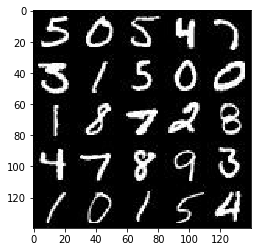

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

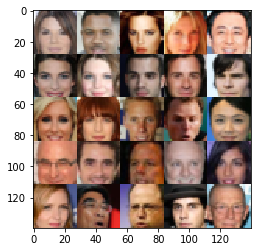

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None,image_width,image_height,image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [60]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        x1 = tf.layers.conv2d(images,64,5,strides=2,padding='same')
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.layers.dropout(x1, rate = 0.6, training=True)
        #14*14
        x2 =tf.layers.conv2d(x1,128,5,strides=2,padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.layers.dropout(x2, rate = 0.6, training=True)
        
        #7*7
        x3 =tf.layers.conv2d(x2,256,5,strides=2,padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.layers.dropout(x3, rate = 0.5, training=True)
        #4*4
        flat = tf.reshape(x3, (-1,4*4*256))
        logits = tf.layers.dense(flat,1)
        out = tf.sigmoid(logits)
        
    
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [74]:
def generator(z, out_channel_dim, is_train=True, reuse=False):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator',reuse=not is_train):
        alpha = 0.2
        x1 = tf.layers.dense(z, 4*4*512)
        x1 = tf.reshape(x1, (-1,4,4,512))
        x1 = tf.layers.batch_normalization(x1, training =is_train)
        #x1 = tf.maximum(alpha * x1, x1)
        #UNSUPERVISED REPRESENTATION LEARNING WITH DEEP CONVOLUTIONAL
        #GENERATIVE ADVERSARIAL NETWORKS
        x1= tf.nn.relu(x1)
        #x1 = tf.layers.dropout(x1, rate = 0.5, training=is_train)
        
        #4*4*512
        #https://github.com/tensorflow/tensorflow/issues/2118
        x2 = tf.layers.conv2d_transpose(x1,256,4,strides=1,padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        #x2 = tf.maximum(alpha * x2, x2)
        x2= tf.nn.relu(x2)
        #x2 = tf.layers.dropout(x2, rate = 0.5,  training=is_train)
        #7*7*256
        x3 = tf.layers.conv2d_transpose(x2,128,5,strides=2,padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        #x3 = tf.maximum(alpha * x3, x3)
        x3= tf.nn.relu(x3)
        #x3 = tf.layers.dropout(x3, rate = 0.5,  training=is_train)
        #14*14*128
        logits = tf.layers.conv2d_transpose(x3,out_channel_dim,5,strides=2,padding='same')
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [50]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    fake_images = generator(input_z, out_channel_dim, is_train=True)
    real_out, real_logit = discriminator(input_real,reuse=False)
    fake_out, fake_logit = discriminator(fake_images,reuse=True)
    
    smooth = 0.1
    
    d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=real_logit, 
                                                        labels=tf.ones_like(real_logit) * (1. - smooth)))
    d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_logit, 
                                                        labels=tf.zeros_like(real_logit)))
    
    d_loss = d_real_loss + d_fake_loss
    
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_logit, 
                                                        labels=tf.ones_like(fake_logit)))
        
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [51]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [52]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [69]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    # TODO: Build Model
    image_channels = 1
    if data_image_mode == 'RGB':
        image_channels = 3
        
    input_real, input_z,lr = model_inputs(data_shape[1], data_shape[2],image_channels,z_dim)
        
    d_loss, g_loss = model_loss(input_real, input_z,image_channels)
        
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size,z_dim)) * 2
                
               
                # Run optimizers
                # https://github.com/soumith/ganhacks
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr:learning_rate})
                
                if steps % 50 == 0:
                    # At the end of each batch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real:  batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                steps = steps + 1
        show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.8349... Generator Loss: 0.2342


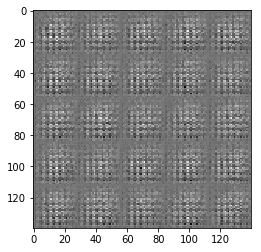

Epoch 1/2... Discriminator Loss: 1.4907... Generator Loss: 0.6091
Epoch 1/2... Discriminator Loss: 1.8878... Generator Loss: 0.8036


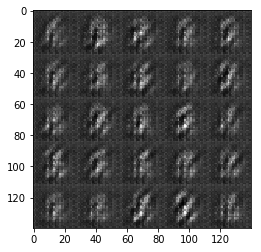

Epoch 1/2... Discriminator Loss: 2.1270... Generator Loss: 0.4371
Epoch 1/2... Discriminator Loss: 1.9450... Generator Loss: 0.4658


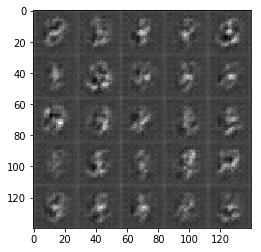

Epoch 1/2... Discriminator Loss: 1.5993... Generator Loss: 0.6412
Epoch 1/2... Discriminator Loss: 1.6954... Generator Loss: 0.9393


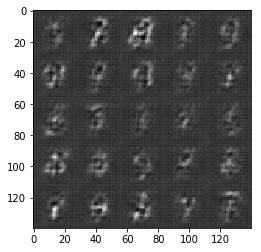

Epoch 1/2... Discriminator Loss: 1.5424... Generator Loss: 0.4372
Epoch 1/2... Discriminator Loss: 1.2946... Generator Loss: 0.5427


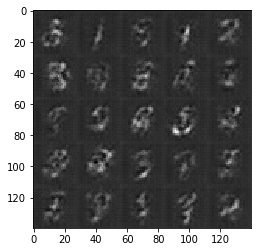

Epoch 1/2... Discriminator Loss: 1.3761... Generator Loss: 0.6829
Epoch 1/2... Discriminator Loss: 1.3909... Generator Loss: 0.6453


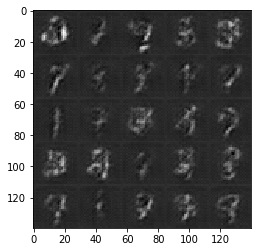

Epoch 1/2... Discriminator Loss: 1.4678... Generator Loss: 0.9376
Epoch 1/2... Discriminator Loss: 1.3270... Generator Loss: 1.2444


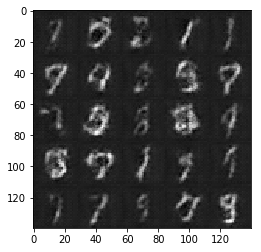

Epoch 1/2... Discriminator Loss: 1.2430... Generator Loss: 1.0933
Epoch 1/2... Discriminator Loss: 1.1228... Generator Loss: 1.0927


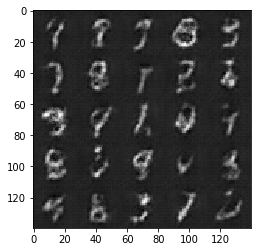

Epoch 1/2... Discriminator Loss: 1.4536... Generator Loss: 0.6178
Epoch 1/2... Discriminator Loss: 1.5923... Generator Loss: 0.5622


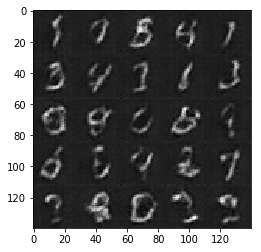

Epoch 1/2... Discriminator Loss: 1.3131... Generator Loss: 0.5876
Epoch 1/2... Discriminator Loss: 1.3538... Generator Loss: 0.7990


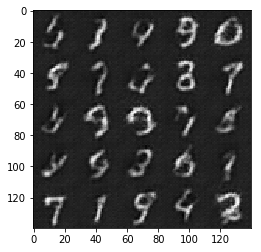

Epoch 1/2... Discriminator Loss: 1.3221... Generator Loss: 0.8366
Epoch 1/2... Discriminator Loss: 1.6180... Generator Loss: 0.5314


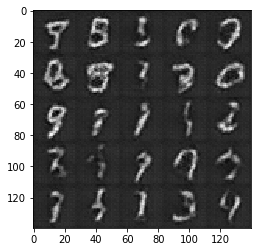

Epoch 1/2... Discriminator Loss: 1.2231... Generator Loss: 0.5793
Epoch 1/2... Discriminator Loss: 1.3185... Generator Loss: 0.7303


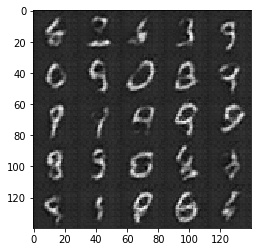

Epoch 1/2... Discriminator Loss: 1.5809... Generator Loss: 0.5623
Epoch 1/2... Discriminator Loss: 1.0800... Generator Loss: 1.5783


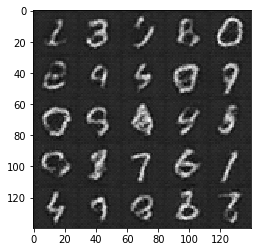

Epoch 1/2... Discriminator Loss: 2.0611... Generator Loss: 0.2587
Epoch 1/2... Discriminator Loss: 1.2647... Generator Loss: 1.5372


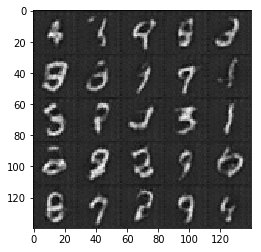

Epoch 1/2... Discriminator Loss: 0.9365... Generator Loss: 0.9755
Epoch 1/2... Discriminator Loss: 1.2989... Generator Loss: 0.9557


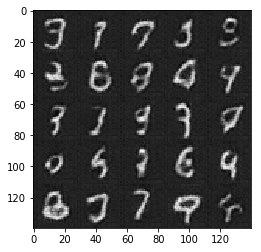

Epoch 1/2... Discriminator Loss: 1.4423... Generator Loss: 0.4492
Epoch 1/2... Discriminator Loss: 1.5689... Generator Loss: 0.4458


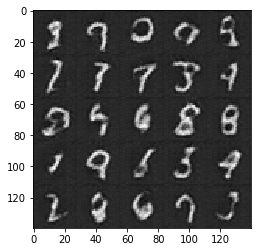

Epoch 1/2... Discriminator Loss: 1.1774... Generator Loss: 0.7950
Epoch 1/2... Discriminator Loss: 1.0877... Generator Loss: 1.3272


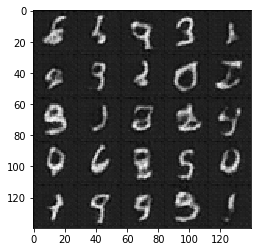

Epoch 1/2... Discriminator Loss: 1.1894... Generator Loss: 1.5524
Epoch 1/2... Discriminator Loss: 0.8678... Generator Loss: 1.2121


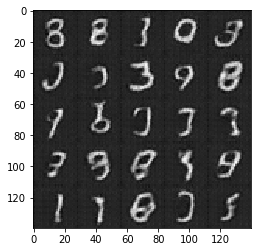

Epoch 1/2... Discriminator Loss: 1.1928... Generator Loss: 0.6965
Epoch 1/2... Discriminator Loss: 1.3902... Generator Loss: 0.5428


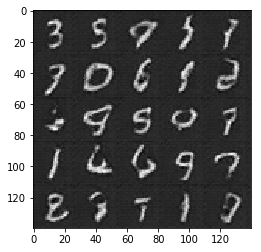

Epoch 1/2... Discriminator Loss: 0.9351... Generator Loss: 0.6698
Epoch 2/2... Discriminator Loss: 1.2921... Generator Loss: 0.5925


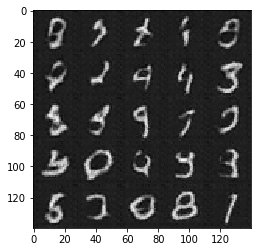

Epoch 2/2... Discriminator Loss: 1.0538... Generator Loss: 0.6715
Epoch 2/2... Discriminator Loss: 1.2606... Generator Loss: 0.4609


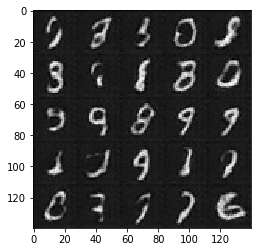

Epoch 2/2... Discriminator Loss: 0.8950... Generator Loss: 1.2108
Epoch 2/2... Discriminator Loss: 1.4013... Generator Loss: 0.9643


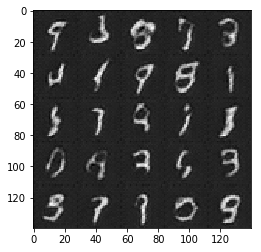

Epoch 2/2... Discriminator Loss: 0.6861... Generator Loss: 1.6810
Epoch 2/2... Discriminator Loss: 1.0061... Generator Loss: 0.7212


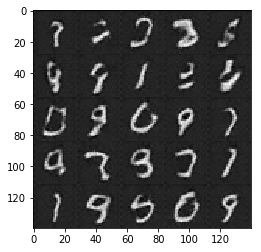

Epoch 2/2... Discriminator Loss: 1.4745... Generator Loss: 0.7098
Epoch 2/2... Discriminator Loss: 0.8624... Generator Loss: 0.9112


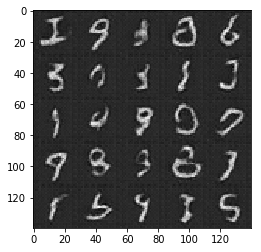

Epoch 2/2... Discriminator Loss: 1.5472... Generator Loss: 0.5693
Epoch 2/2... Discriminator Loss: 1.0639... Generator Loss: 0.8495


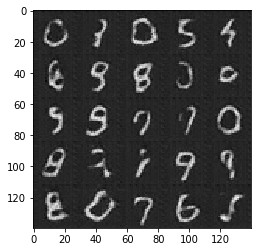

Epoch 2/2... Discriminator Loss: 1.0706... Generator Loss: 0.6692
Epoch 2/2... Discriminator Loss: 1.2989... Generator Loss: 0.6834


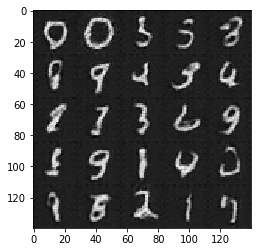

Epoch 2/2... Discriminator Loss: 1.3935... Generator Loss: 1.2238
Epoch 2/2... Discriminator Loss: 1.2675... Generator Loss: 0.8011


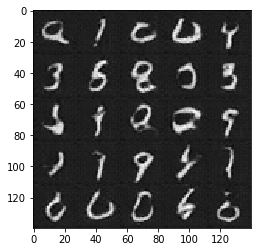

Epoch 2/2... Discriminator Loss: 0.9752... Generator Loss: 1.1922
Epoch 2/2... Discriminator Loss: 1.2680... Generator Loss: 0.9419


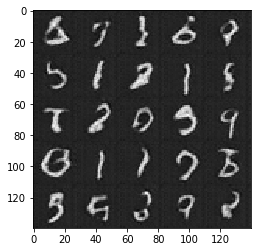

Epoch 2/2... Discriminator Loss: 1.0592... Generator Loss: 0.9604
Epoch 2/2... Discriminator Loss: 1.3081... Generator Loss: 1.4936


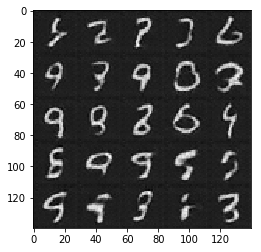

Epoch 2/2... Discriminator Loss: 1.0640... Generator Loss: 1.1788
Epoch 2/2... Discriminator Loss: 1.2374... Generator Loss: 1.2226


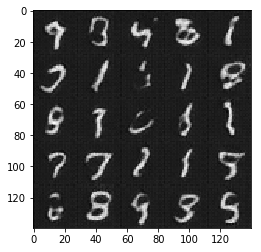

Epoch 2/2... Discriminator Loss: 1.6560... Generator Loss: 0.6504
Epoch 2/2... Discriminator Loss: 1.4141... Generator Loss: 0.6159


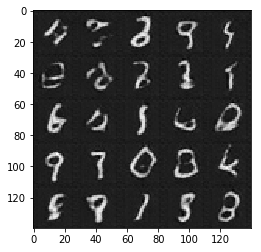

Epoch 2/2... Discriminator Loss: 0.9143... Generator Loss: 1.9341
Epoch 2/2... Discriminator Loss: 1.2141... Generator Loss: 1.1008


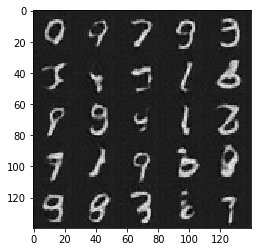

Epoch 2/2... Discriminator Loss: 1.2137... Generator Loss: 0.4607
Epoch 2/2... Discriminator Loss: 1.2976... Generator Loss: 0.9642


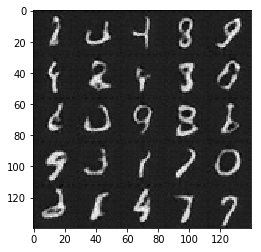

Epoch 2/2... Discriminator Loss: 1.0824... Generator Loss: 0.6516
Epoch 2/2... Discriminator Loss: 1.1215... Generator Loss: 1.1817


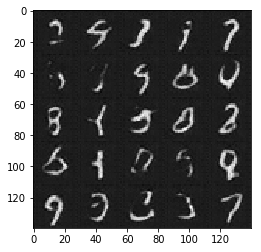

Epoch 2/2... Discriminator Loss: 1.2688... Generator Loss: 1.4939
Epoch 2/2... Discriminator Loss: 1.5320... Generator Loss: 0.4287


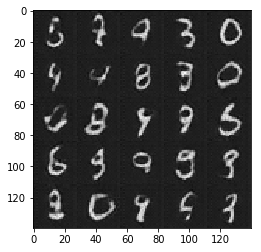

Epoch 2/2... Discriminator Loss: 1.3925... Generator Loss: 1.6291
Epoch 2/2... Discriminator Loss: 1.3073... Generator Loss: 0.8658


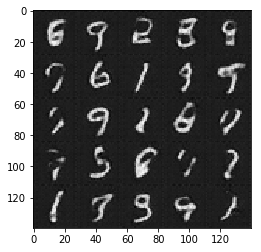

Epoch 2/2... Discriminator Loss: 1.1259... Generator Loss: 1.0656
Epoch 2/2... Discriminator Loss: 1.1355... Generator Loss: 0.8714


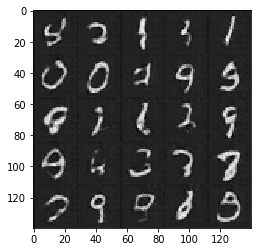

Epoch 2/2... Discriminator Loss: 1.2946... Generator Loss: 1.5011
Epoch 2/2... Discriminator Loss: 1.3183... Generator Loss: 0.9465


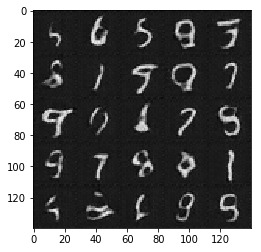

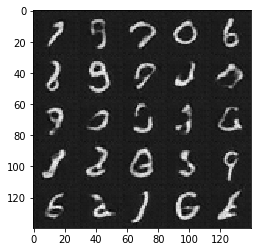

In [75]:
batch_size = 32
z_dim = 100
learning_rate = 0.0003
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.2364... Generator Loss: 0.3432


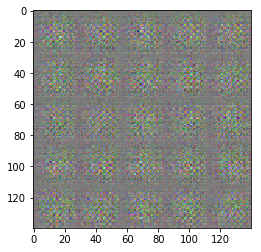

Epoch 1/1... Discriminator Loss: 2.3174... Generator Loss: 0.6711
Epoch 1/1... Discriminator Loss: 1.1078... Generator Loss: 0.9368


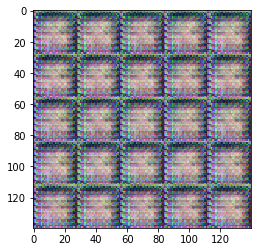

Epoch 1/1... Discriminator Loss: 2.8973... Generator Loss: 0.2968
Epoch 1/1... Discriminator Loss: 0.9506... Generator Loss: 1.7824


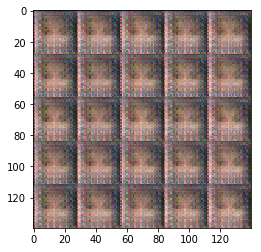

Epoch 1/1... Discriminator Loss: 1.9210... Generator Loss: 0.7486
Epoch 1/1... Discriminator Loss: 1.4825... Generator Loss: 0.8358


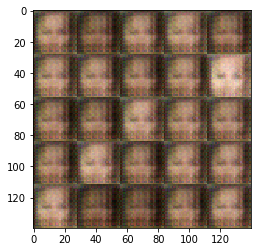

Epoch 1/1... Discriminator Loss: 2.0383... Generator Loss: 0.9054
Epoch 1/1... Discriminator Loss: 1.5530... Generator Loss: 0.6785


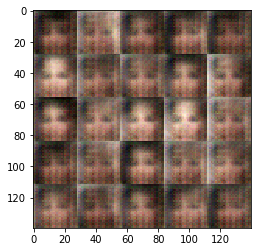

Epoch 1/1... Discriminator Loss: 0.9129... Generator Loss: 1.4074
Epoch 1/1... Discriminator Loss: 0.4397... Generator Loss: 4.5105


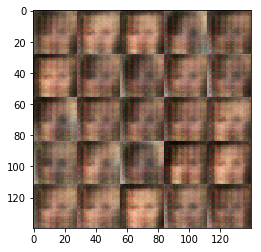

Epoch 1/1... Discriminator Loss: 2.5463... Generator Loss: 0.2138
Epoch 1/1... Discriminator Loss: 2.2979... Generator Loss: 0.2667


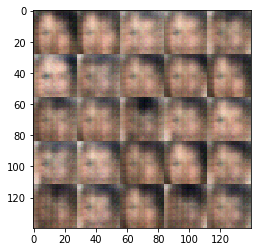

Epoch 1/1... Discriminator Loss: 1.7598... Generator Loss: 0.6291
Epoch 1/1... Discriminator Loss: 1.2795... Generator Loss: 1.3812


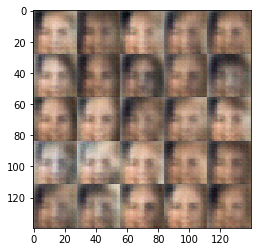

Epoch 1/1... Discriminator Loss: 0.8474... Generator Loss: 1.3155
Epoch 1/1... Discriminator Loss: 1.2396... Generator Loss: 0.9556


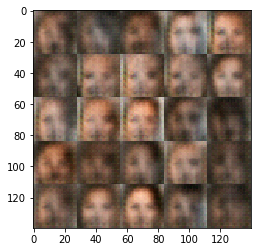

Epoch 1/1... Discriminator Loss: 1.2500... Generator Loss: 0.8972
Epoch 1/1... Discriminator Loss: 1.5275... Generator Loss: 0.7410


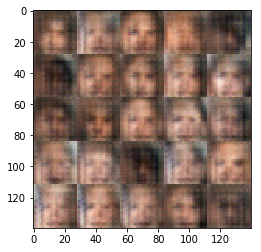

Epoch 1/1... Discriminator Loss: 1.5478... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.3678... Generator Loss: 0.9364


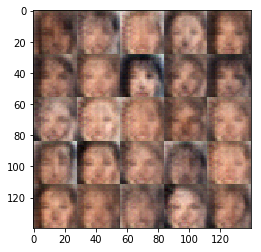

Epoch 1/1... Discriminator Loss: 1.5604... Generator Loss: 0.6496
Epoch 1/1... Discriminator Loss: 1.1152... Generator Loss: 1.2538


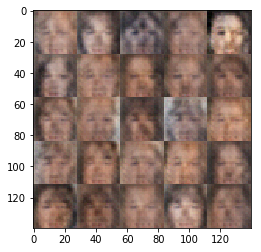

Epoch 1/1... Discriminator Loss: 1.6913... Generator Loss: 0.5581
Epoch 1/1... Discriminator Loss: 1.5285... Generator Loss: 0.5925


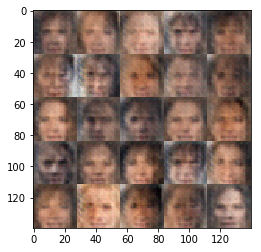

Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.8723
Epoch 1/1... Discriminator Loss: 1.2915... Generator Loss: 0.6617


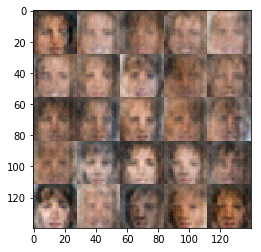

Epoch 1/1... Discriminator Loss: 1.5664... Generator Loss: 0.7082
Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 0.7580


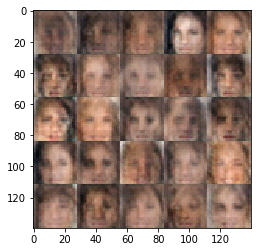

Epoch 1/1... Discriminator Loss: 1.2623... Generator Loss: 0.9990
Epoch 1/1... Discriminator Loss: 1.2428... Generator Loss: 1.2904


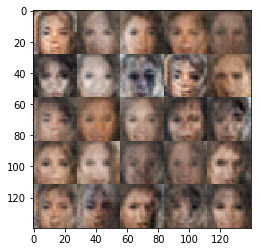

Epoch 1/1... Discriminator Loss: 1.5865... Generator Loss: 0.7919
Epoch 1/1... Discriminator Loss: 1.3020... Generator Loss: 0.6785


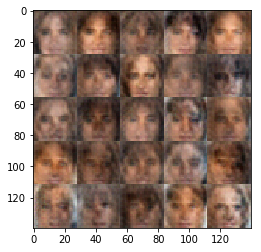

Epoch 1/1... Discriminator Loss: 1.5049... Generator Loss: 0.5413
Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 1.2353


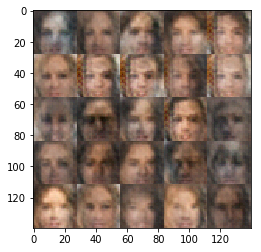

Epoch 1/1... Discriminator Loss: 1.3977... Generator Loss: 0.8778
Epoch 1/1... Discriminator Loss: 1.4931... Generator Loss: 0.7957


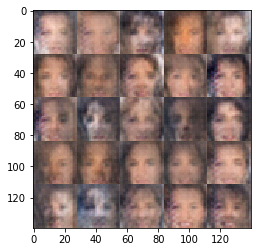

Epoch 1/1... Discriminator Loss: 1.3392... Generator Loss: 0.6655
Epoch 1/1... Discriminator Loss: 1.3164... Generator Loss: 0.6825


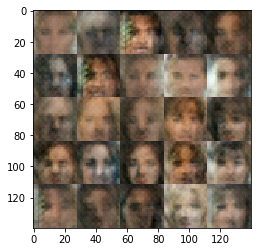

Epoch 1/1... Discriminator Loss: 1.4330... Generator Loss: 0.8300
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.7235


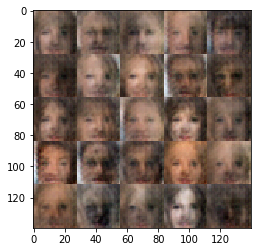

Epoch 1/1... Discriminator Loss: 1.5202... Generator Loss: 0.6916
Epoch 1/1... Discriminator Loss: 1.3044... Generator Loss: 0.7825


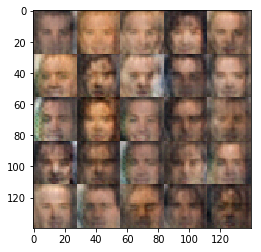

Epoch 1/1... Discriminator Loss: 1.4357... Generator Loss: 0.5869
Epoch 1/1... Discriminator Loss: 1.1697... Generator Loss: 1.1520


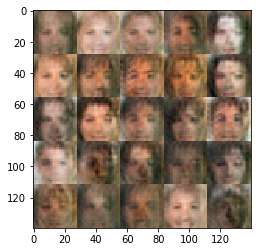

Epoch 1/1... Discriminator Loss: 1.3830... Generator Loss: 0.8943
Epoch 1/1... Discriminator Loss: 1.5433... Generator Loss: 0.7471


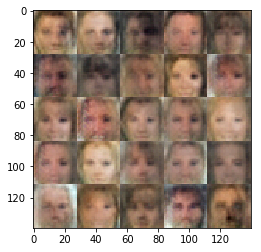

Epoch 1/1... Discriminator Loss: 1.5606... Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 1.4470... Generator Loss: 0.8067


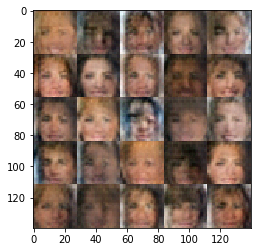

Epoch 1/1... Discriminator Loss: 1.4697... Generator Loss: 0.8052
Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.9423


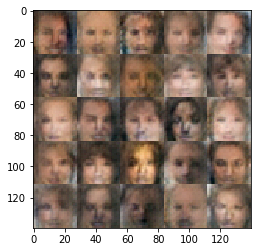

Epoch 1/1... Discriminator Loss: 1.4227... Generator Loss: 0.6955
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.8454


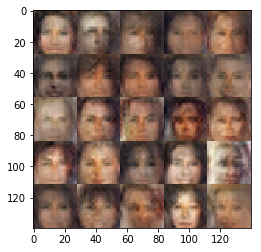

Epoch 1/1... Discriminator Loss: 1.3293... Generator Loss: 0.7881
Epoch 1/1... Discriminator Loss: 1.3841... Generator Loss: 0.7016


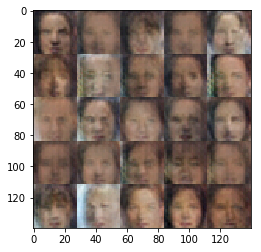

Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 0.6328
Epoch 1/1... Discriminator Loss: 1.4403... Generator Loss: 0.7503


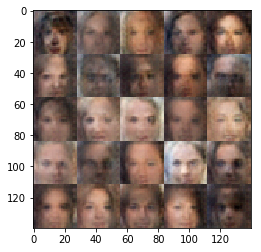

Epoch 1/1... Discriminator Loss: 1.2733... Generator Loss: 0.6990
Epoch 1/1... Discriminator Loss: 1.4181... Generator Loss: 0.7976


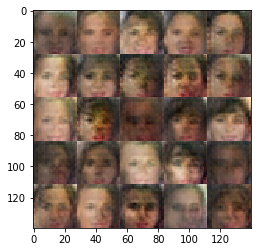

Epoch 1/1... Discriminator Loss: 1.5347... Generator Loss: 0.7556
Epoch 1/1... Discriminator Loss: 1.3616... Generator Loss: 0.6572


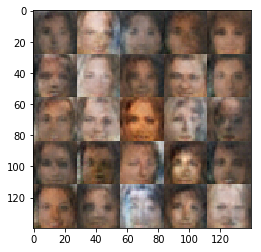

Epoch 1/1... Discriminator Loss: 1.4515... Generator Loss: 0.7093
Epoch 1/1... Discriminator Loss: 1.4678... Generator Loss: 0.6574


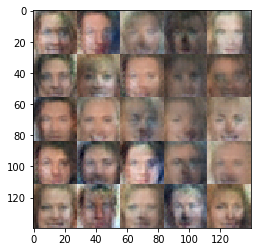

Epoch 1/1... Discriminator Loss: 1.4464... Generator Loss: 0.6299
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.7204


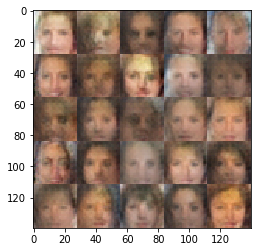

Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.8515
Epoch 1/1... Discriminator Loss: 1.3095... Generator Loss: 0.7453


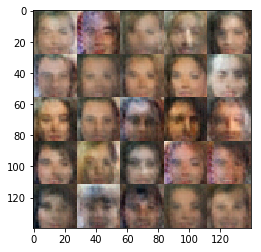

Epoch 1/1... Discriminator Loss: 1.4200... Generator Loss: 0.7548
Epoch 1/1... Discriminator Loss: 1.4247... Generator Loss: 0.8015


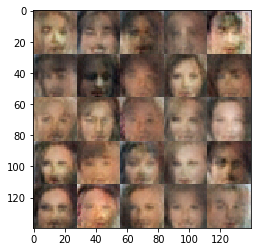

Epoch 1/1... Discriminator Loss: 1.3856... Generator Loss: 0.8095
Epoch 1/1... Discriminator Loss: 1.3881... Generator Loss: 0.6860


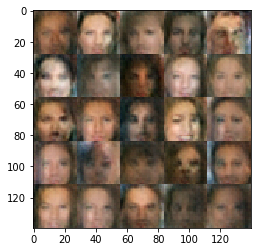

Epoch 1/1... Discriminator Loss: 1.3877... Generator Loss: 0.7056
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.8637


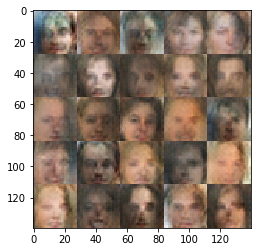

Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.7788
Epoch 1/1... Discriminator Loss: 1.3719... Generator Loss: 0.7289


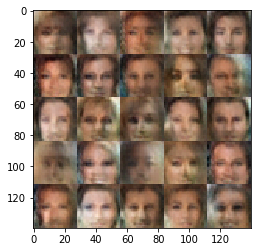

Epoch 1/1... Discriminator Loss: 1.3904... Generator Loss: 0.7625
Epoch 1/1... Discriminator Loss: 1.4392... Generator Loss: 0.7594


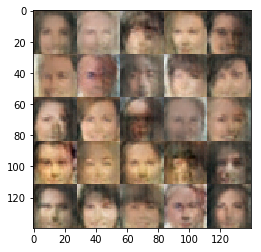

Epoch 1/1... Discriminator Loss: 1.4057... Generator Loss: 0.8848
Epoch 1/1... Discriminator Loss: 1.4101... Generator Loss: 0.7976


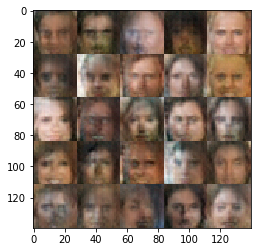

Epoch 1/1... Discriminator Loss: 1.4613... Generator Loss: 0.7293
Epoch 1/1... Discriminator Loss: 1.3775... Generator Loss: 0.7439


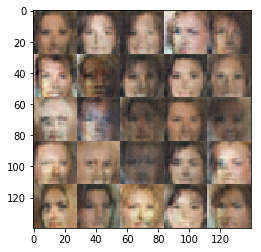

Epoch 1/1... Discriminator Loss: 1.4302... Generator Loss: 0.7135
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.7981


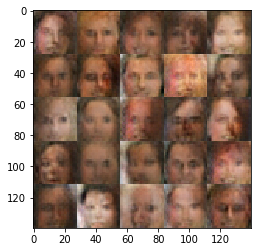

Epoch 1/1... Discriminator Loss: 1.4310... Generator Loss: 0.8087
Epoch 1/1... Discriminator Loss: 1.3688... Generator Loss: 0.8539


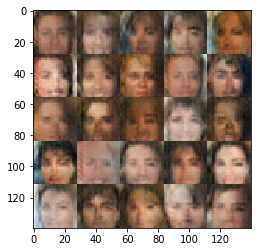

Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.7915
Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 0.6934


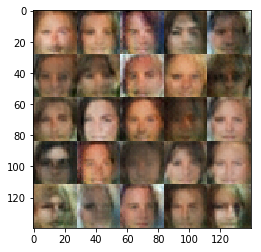

Epoch 1/1... Discriminator Loss: 1.3998... Generator Loss: 0.8240
Epoch 1/1... Discriminator Loss: 1.4305... Generator Loss: 0.6901


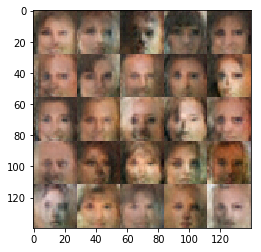

Epoch 1/1... Discriminator Loss: 1.4082... Generator Loss: 0.8226
Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 0.7309


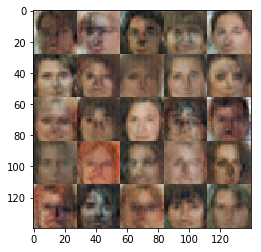

Epoch 1/1... Discriminator Loss: 1.3530... Generator Loss: 0.7720
Epoch 1/1... Discriminator Loss: 1.5127... Generator Loss: 0.7290


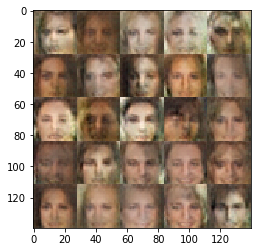

Epoch 1/1... Discriminator Loss: 1.4510... Generator Loss: 0.8768
Epoch 1/1... Discriminator Loss: 1.4213... Generator Loss: 0.7322


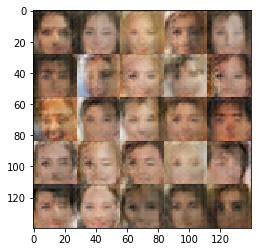

Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.7672
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.8526


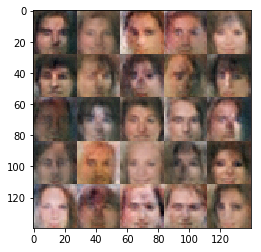

Epoch 1/1... Discriminator Loss: 1.3753... Generator Loss: 0.7519
Epoch 1/1... Discriminator Loss: 1.3440... Generator Loss: 0.7069


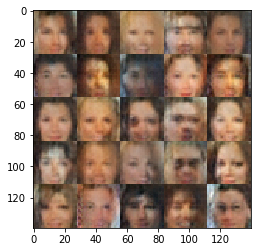

Epoch 1/1... Discriminator Loss: 1.3776... Generator Loss: 0.6624
Epoch 1/1... Discriminator Loss: 1.3361... Generator Loss: 0.8104


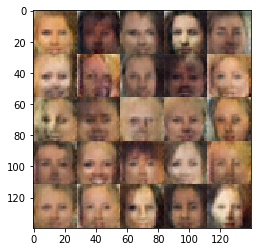

Epoch 1/1... Discriminator Loss: 1.4739... Generator Loss: 0.7281
Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.7984


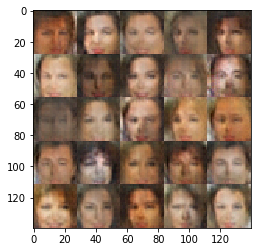

Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 0.7917
Epoch 1/1... Discriminator Loss: 1.4202... Generator Loss: 0.7013


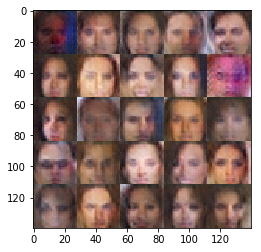

Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.6760
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.7963


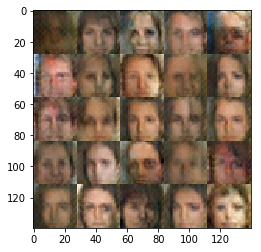

Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.8245
Epoch 1/1... Discriminator Loss: 1.4634... Generator Loss: 0.7602


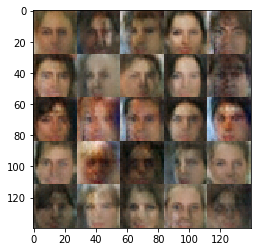

Epoch 1/1... Discriminator Loss: 1.3691... Generator Loss: 0.8006
Epoch 1/1... Discriminator Loss: 1.4175... Generator Loss: 0.7487


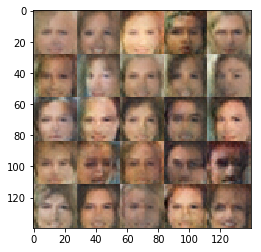

Epoch 1/1... Discriminator Loss: 1.4793... Generator Loss: 0.7559
Epoch 1/1... Discriminator Loss: 1.4295... Generator Loss: 0.6546


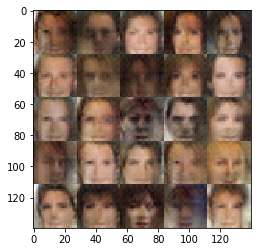

Epoch 1/1... Discriminator Loss: 1.3779... Generator Loss: 0.7680
Epoch 1/1... Discriminator Loss: 1.3548... Generator Loss: 0.7583


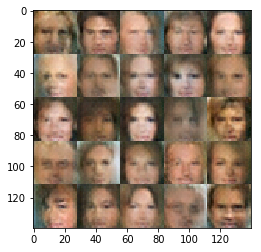

Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.7270
Epoch 1/1... Discriminator Loss: 1.4309... Generator Loss: 0.7204


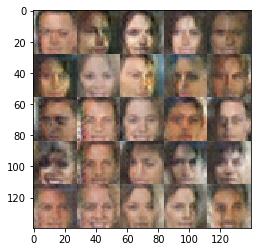

Epoch 1/1... Discriminator Loss: 1.3794... Generator Loss: 0.8017
Epoch 1/1... Discriminator Loss: 1.4389... Generator Loss: 0.6720


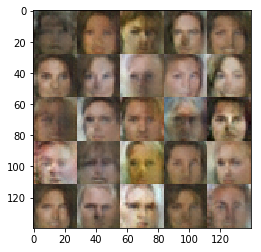

Epoch 1/1... Discriminator Loss: 1.5054... Generator Loss: 0.7845
Epoch 1/1... Discriminator Loss: 1.3774... Generator Loss: 0.8076


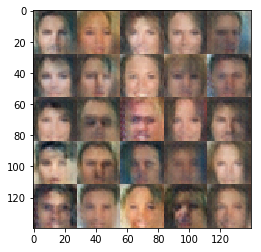

Epoch 1/1... Discriminator Loss: 1.3590... Generator Loss: 0.8272
Epoch 1/1... Discriminator Loss: 1.4219... Generator Loss: 0.7245


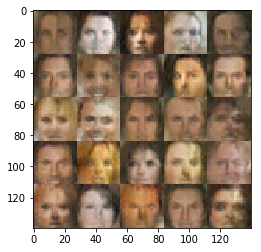

Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.7277
Epoch 1/1... Discriminator Loss: 1.4356... Generator Loss: 0.7387


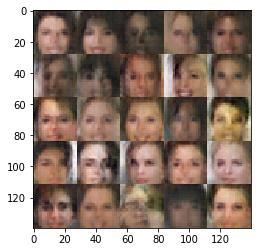

Epoch 1/1... Discriminator Loss: 1.3755... Generator Loss: 0.7850
Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.7903


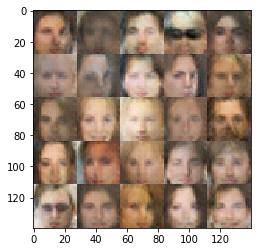

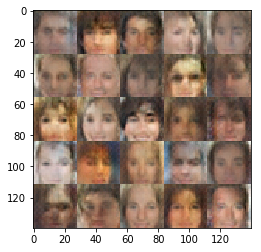

In [77]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.